In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
features = pd.read_csv('training_set_features.csv')

In [3]:
features.shape

(26707, 36)

In [4]:
labels = pd.read_csv('training_set_labels.csv')

In [5]:
labels.shape

(26707, 3)

In [6]:
labels

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [7]:
features

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [8]:
labels.describe()

,respondent_id,xyz_vaccine,seasonal_vaccine
count,26707.000000,26707.000000,26707.000000
mean,13353.000000,0.212454,0.465608
std,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000
25%,6676.500000,0.000000,0.000000
50%,13353.000000,0.000000,0.000000
75%,20029.500000,0.000000,1.000000
max,26706.000000,1.000000,1.000000


In [9]:
features.describe()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [10]:
np.testing.assert_array_equal(features.index.values, labels.index.values)


In [11]:
labels = labels.set_index('respondent_id')

In [12]:
features = features.set_index('respondent_id')

In [13]:
features

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


# Exploratory Data Analysis

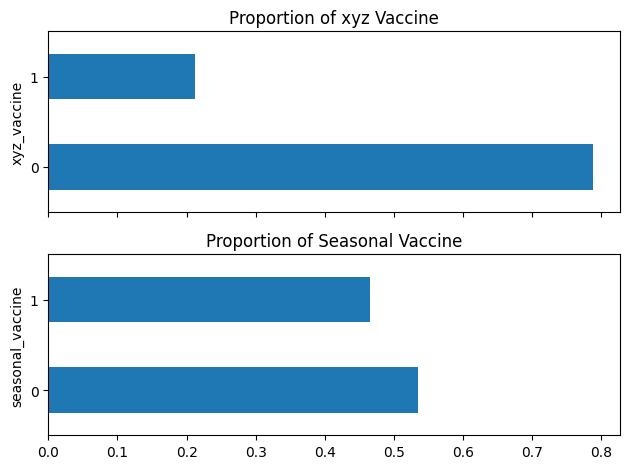

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True)

n_obs = labels.shape[0]

(labels['xyz_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of xyz Vaccine", ax=ax[0])
)
ax[0].set_ylabel("xyz_vaccine")

(labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of Seasonal Vaccine", ax=ax[1])
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

Note: xyz Vaccine has pretty much imbalanced classes.

<Axes: >

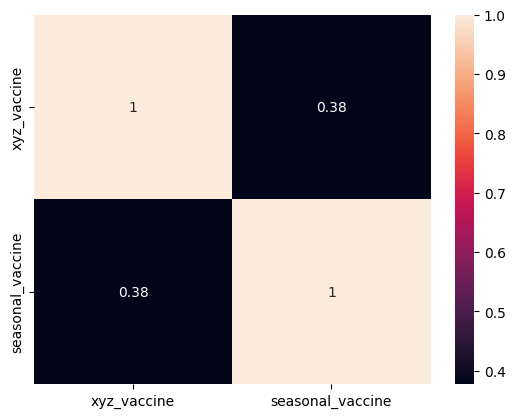

In [15]:
sns.heatmap(labels.corr(), annot=True)

In [16]:
pd.crosstab(
    labels['xyz_vaccine'],
    labels['seasonal_vaccine'],
    normalize=True,
    margins=True
)

seasonal_vaccine,0,1,All
xyz_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


Phi value of 0.38, moderately positively correlated.

In [17]:
features.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [18]:
train_data = features.join(labels)

In [19]:
train_data.columns

Index(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

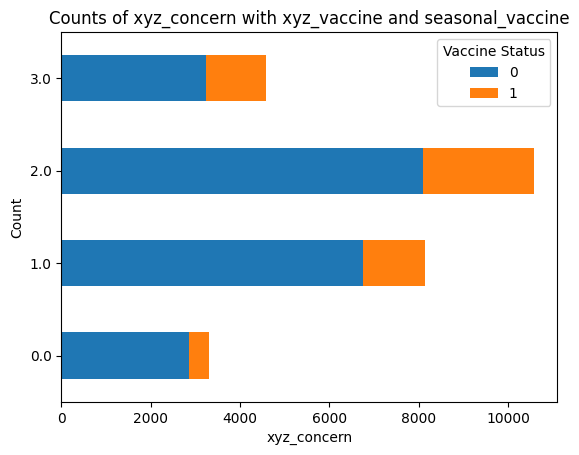

In [20]:
column = 'xyz_concern'
data_grouped = train_data.groupby([column, 'xyz_vaccine']).size().unstack(fill_value=0)
    
# Plotting the grouped data
data_grouped.plot(kind='barh', stacked=True)
    
plt.title(f'Counts of {column} with xyz_vaccine and seasonal_vaccine')
plt.xlabel(column)
plt.ylabel('Count')
plt.legend(title='Vaccine Status')

In [21]:
counts = (train_data[['xyz_concern', 'xyz_vaccine']]
              .groupby(['xyz_concern', 'xyz_vaccine'])
              .size()
              .unstack('xyz_vaccine')
         )
counts

xyz_vaccine,0,1
xyz_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


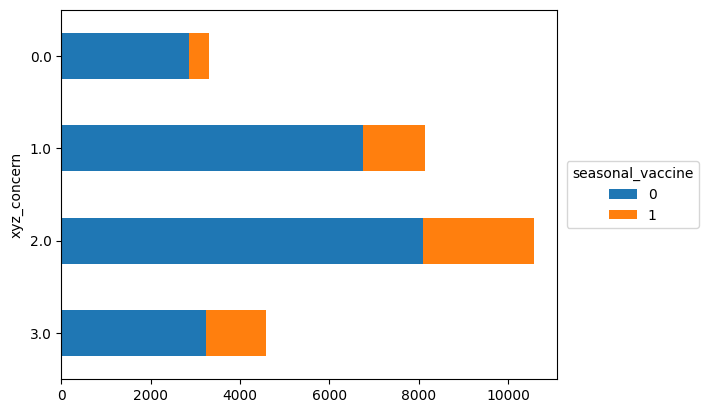

In [22]:
ax = counts.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='seasonal_vaccine'
)

In [23]:
rate = counts.div(counts.sum(axis='columns'), axis='index')

In [24]:
rate

xyz_vaccine,0,1
xyz_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


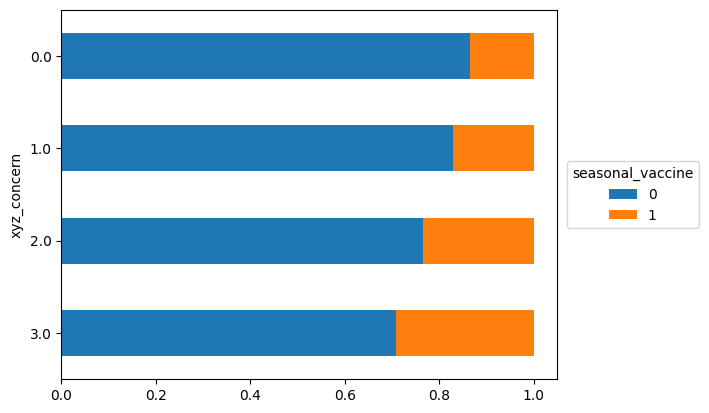

In [25]:
ax = rate.plot.barh(stacked=True)
ax.invert_yaxis()
ax.legend(
    loc='center right', 
    bbox_to_anchor=(1.3, 0.5), 
    title='seasonal_vaccine'
)

In [26]:
def vacc_rate_plot(column, label):
    counts = (train_data[[column, label]]
              .groupby([column, label])
              .size()
              .unstack(label)
             )
    plt.figsize=(5,1.5)
    
    rate = counts.div(counts.sum(axis='columns'), axis='index')
    
    ax = rate.plot.barh(stacked=True)
    ax.invert_yaxis()
    ax.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), title=label)
    return 0

C:\Users\aruna\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


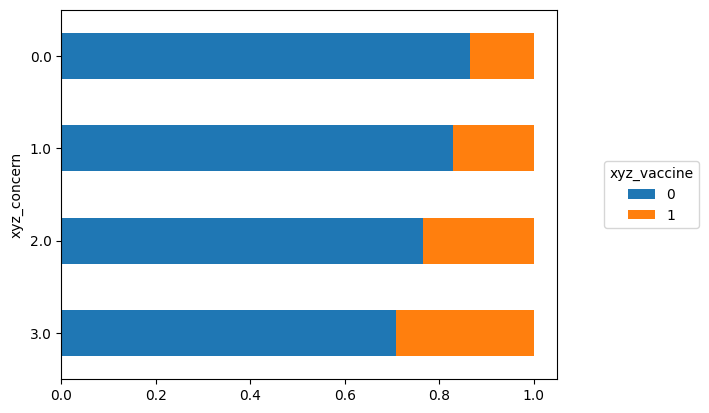

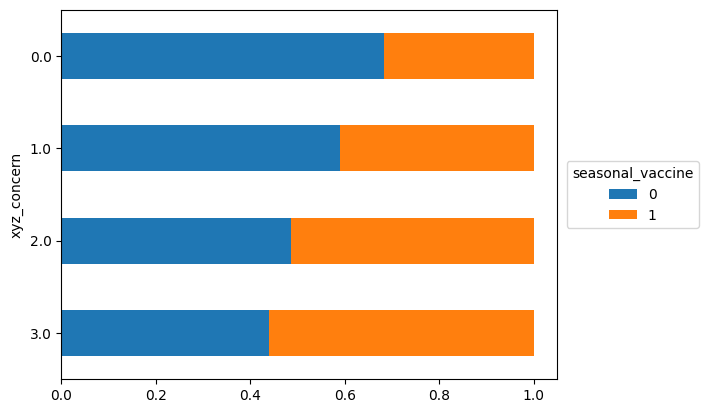

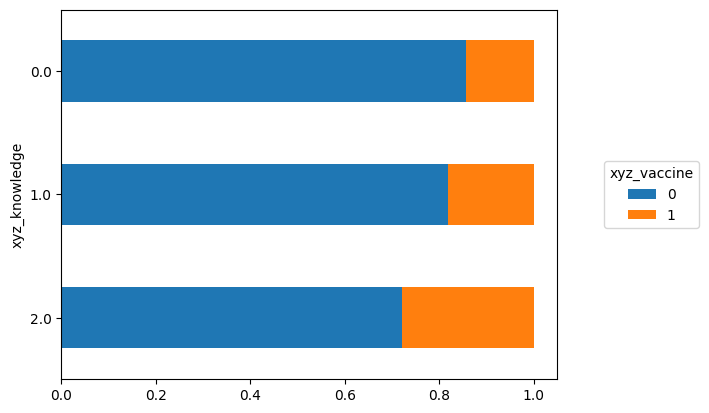

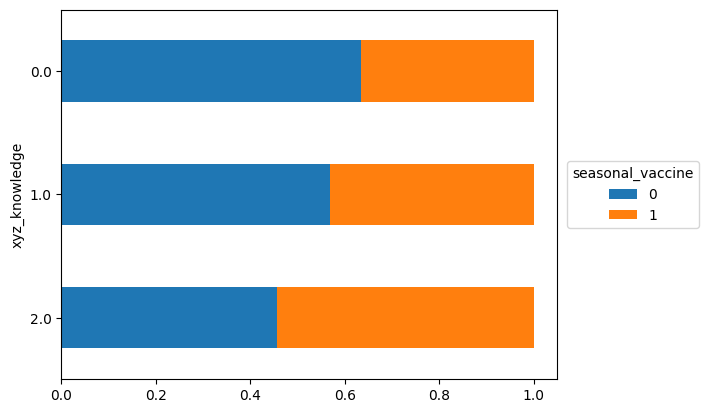

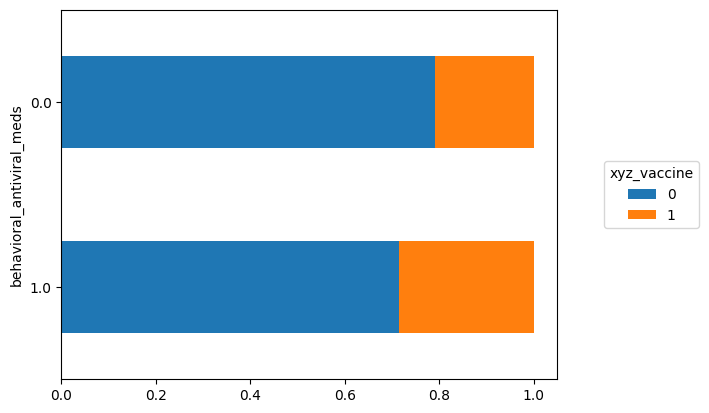

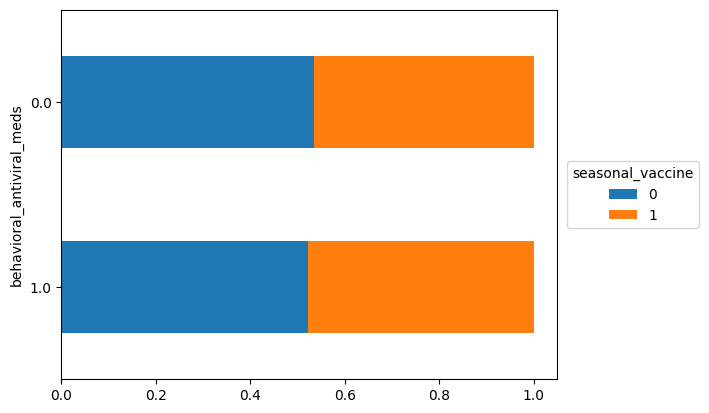

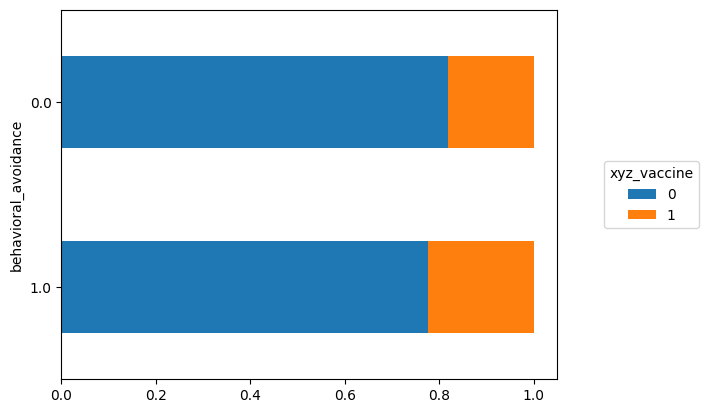

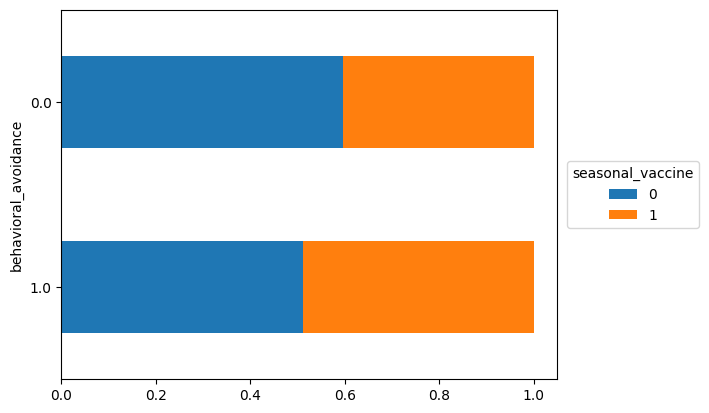

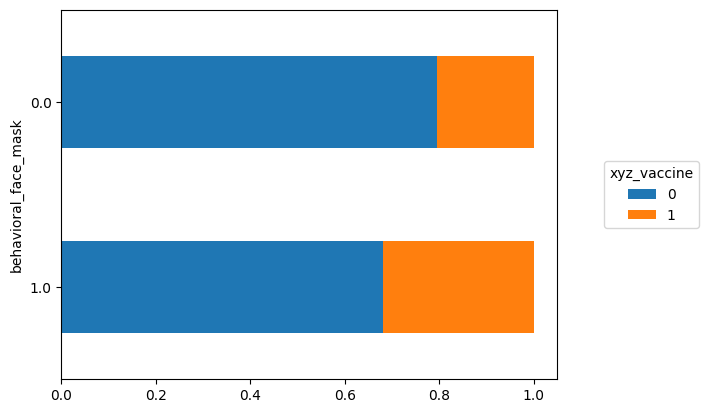

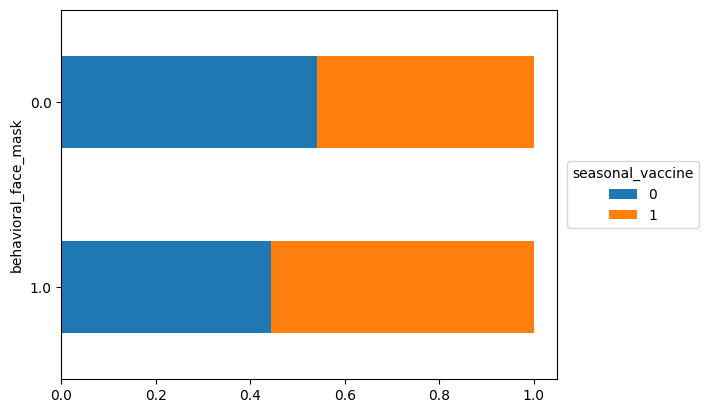

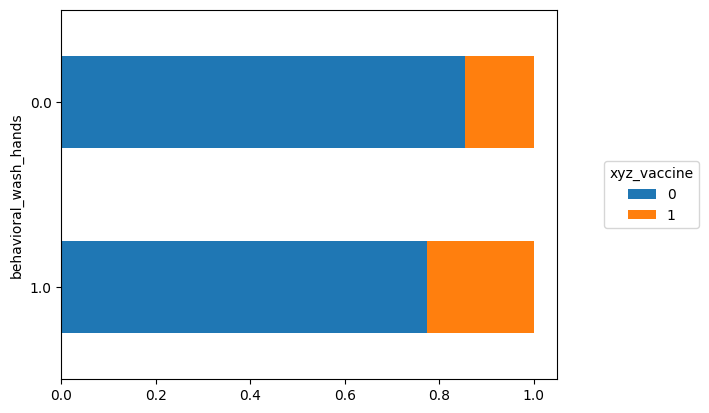

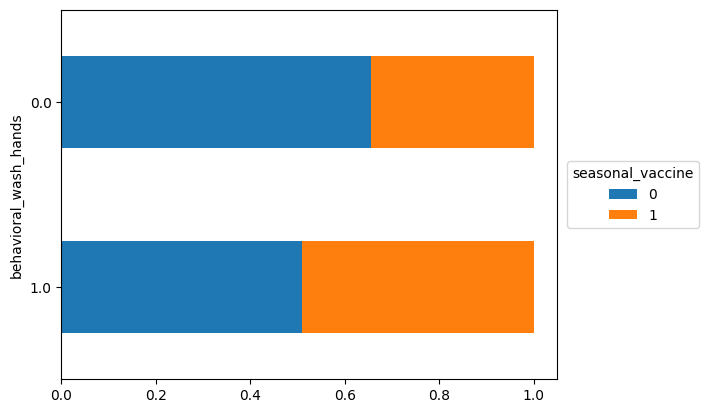

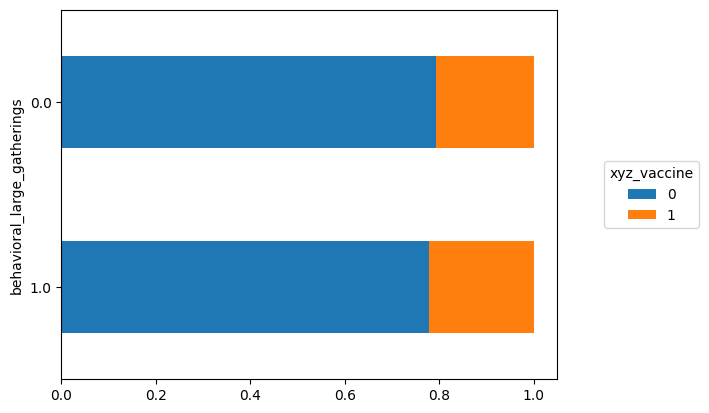

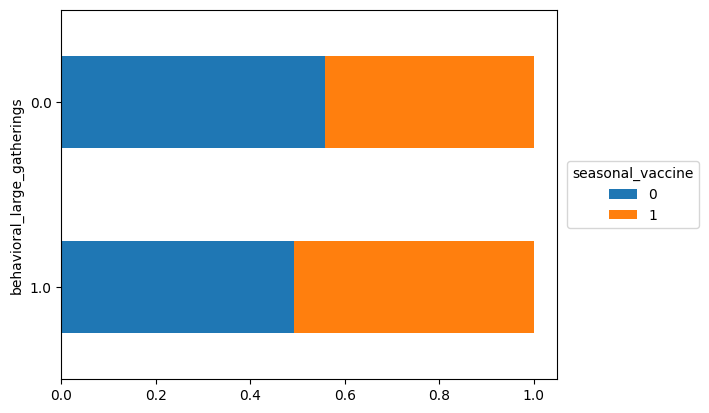

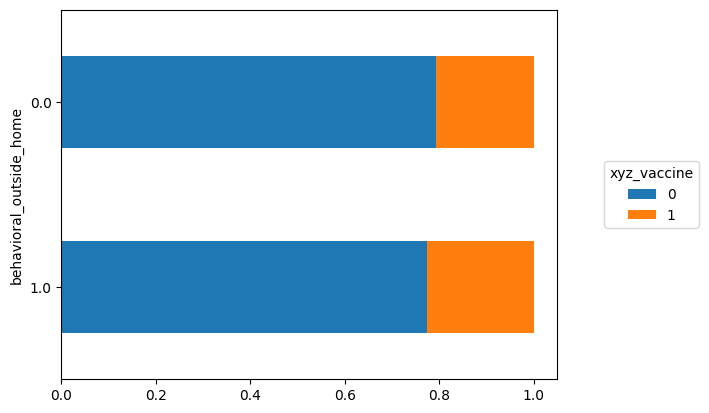

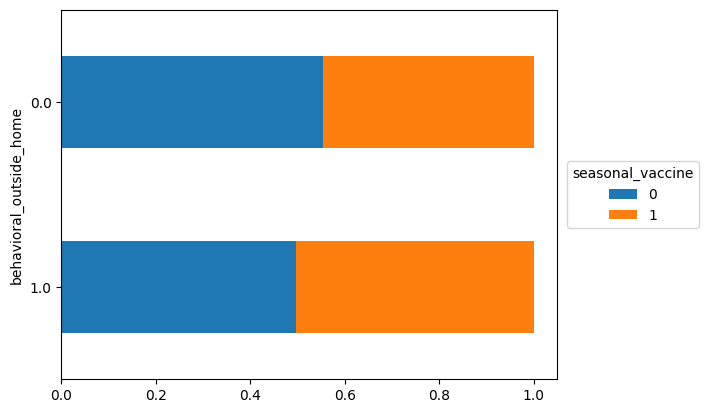

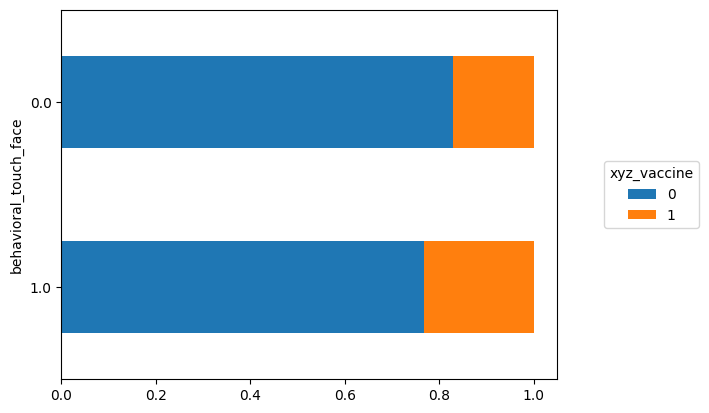

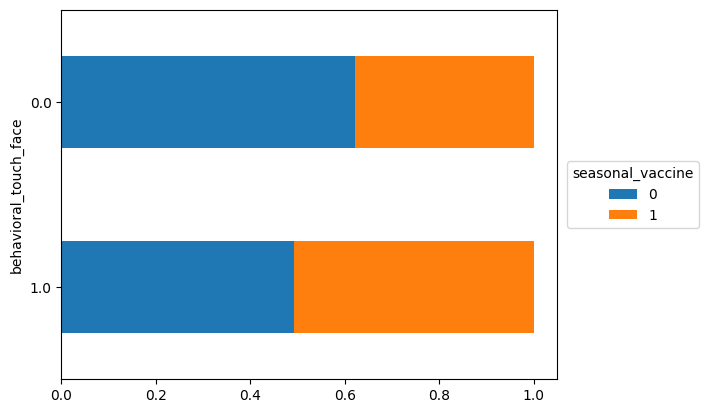

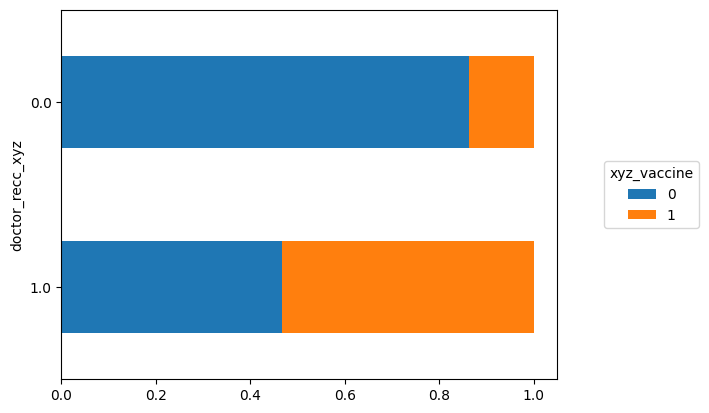

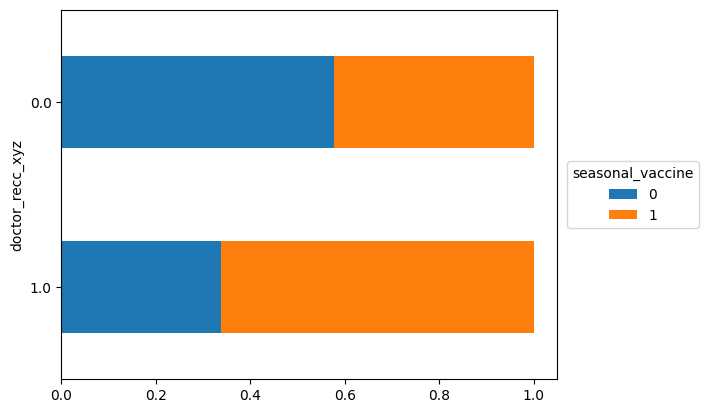

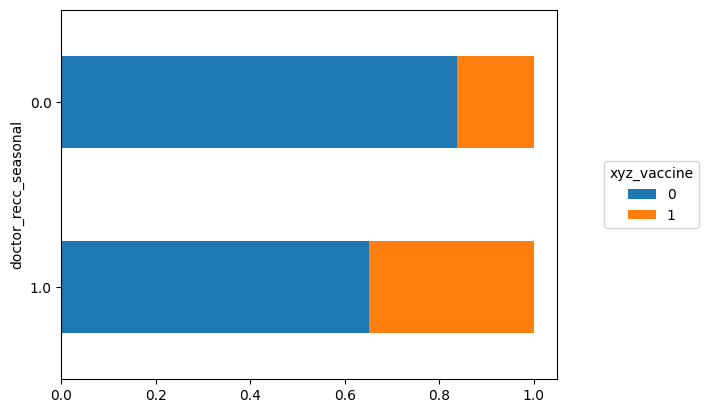

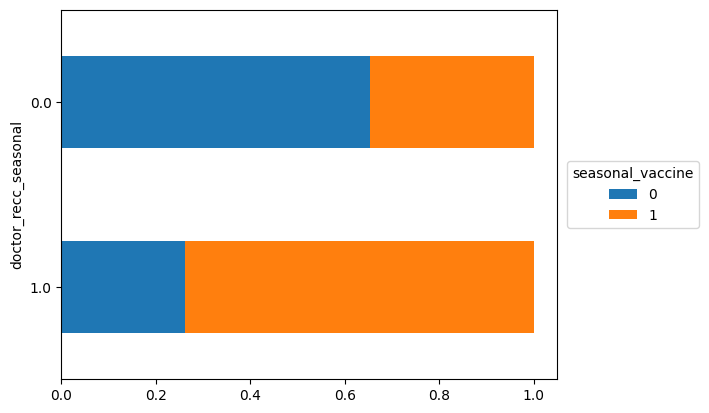

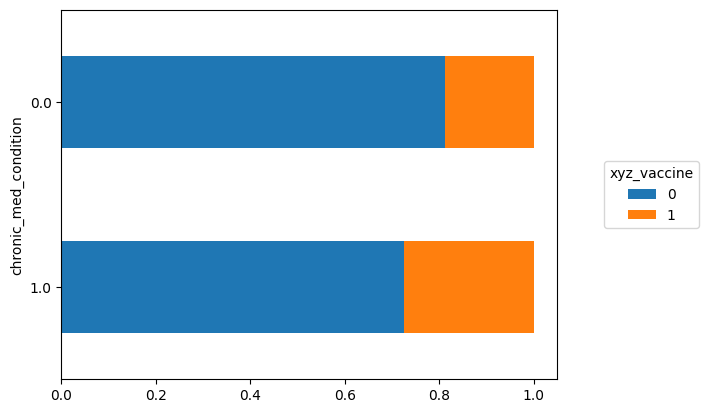

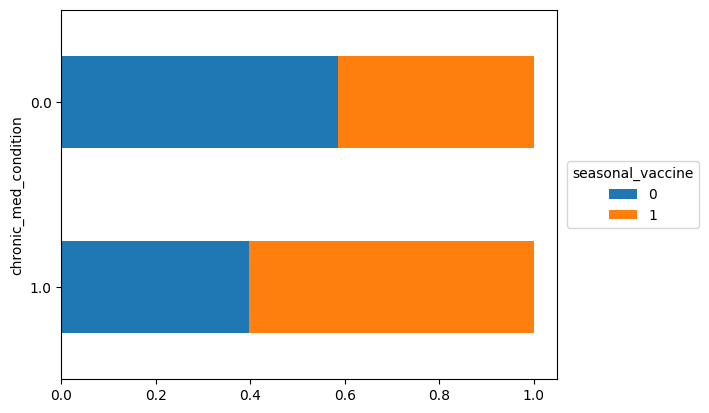

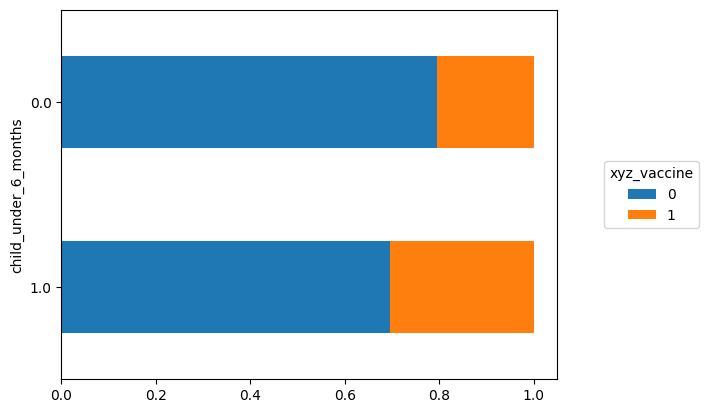

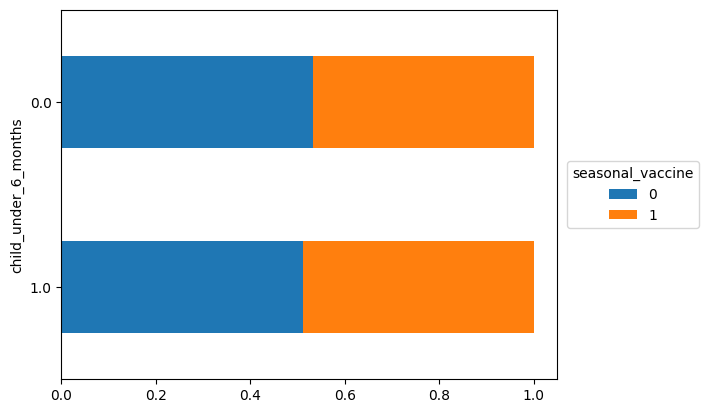

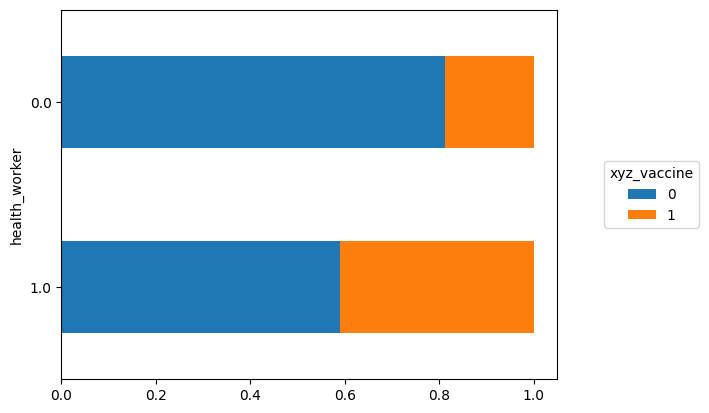

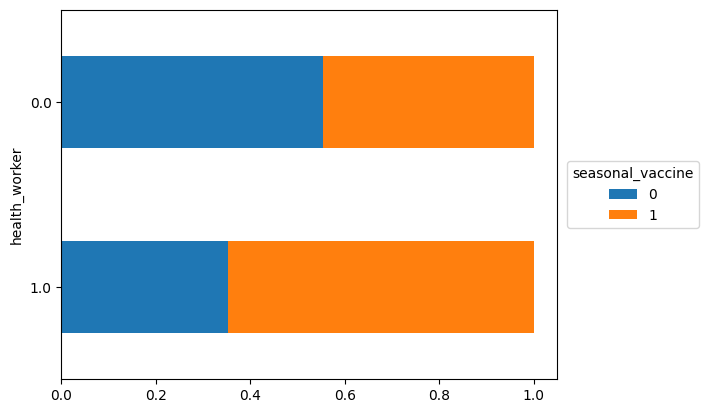

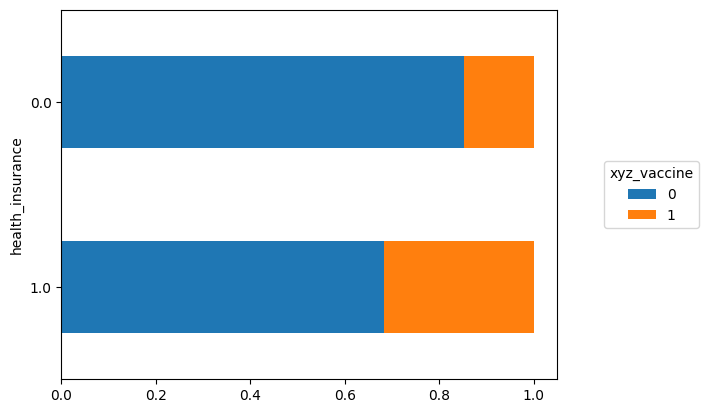

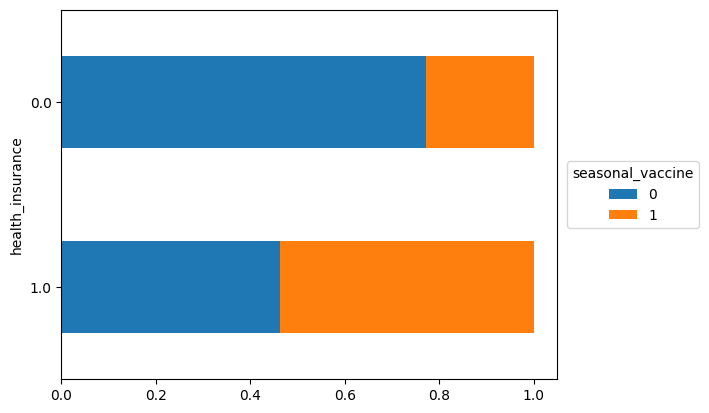

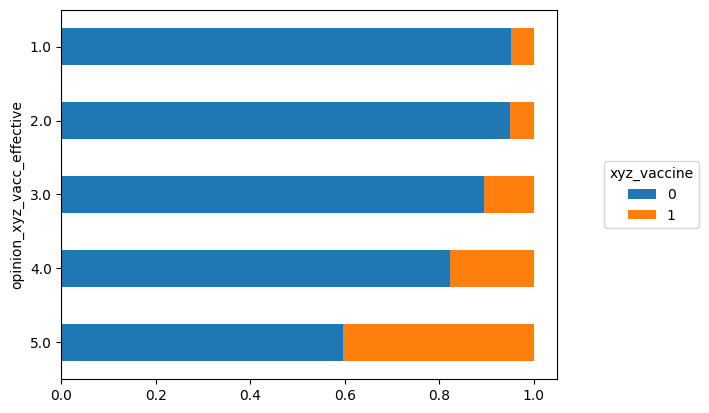

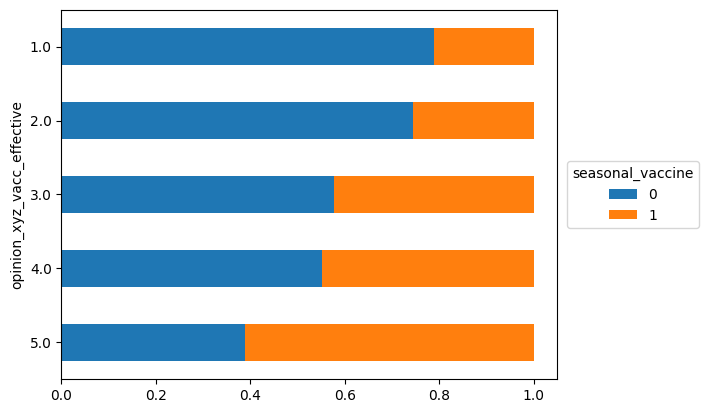

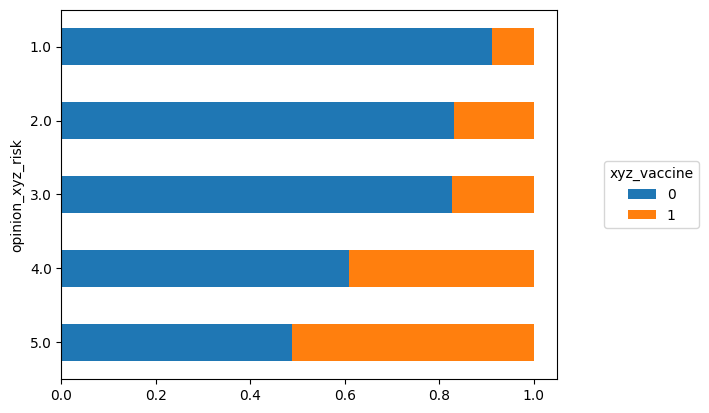

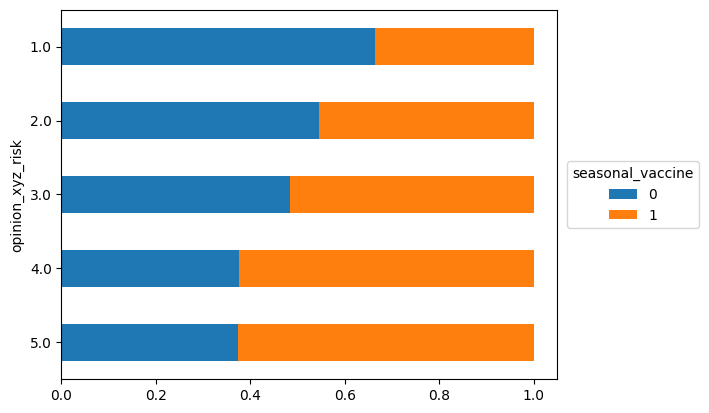

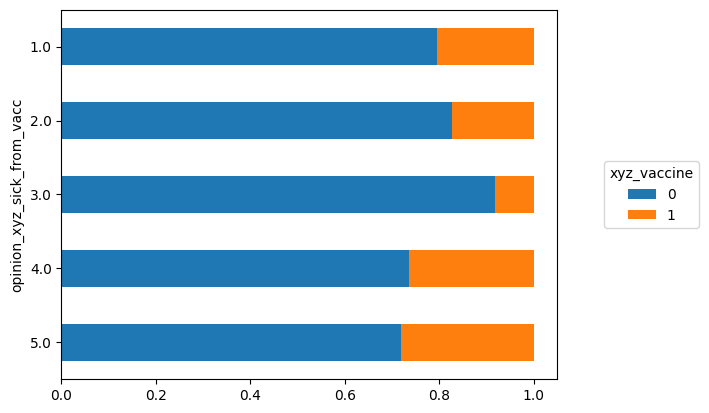

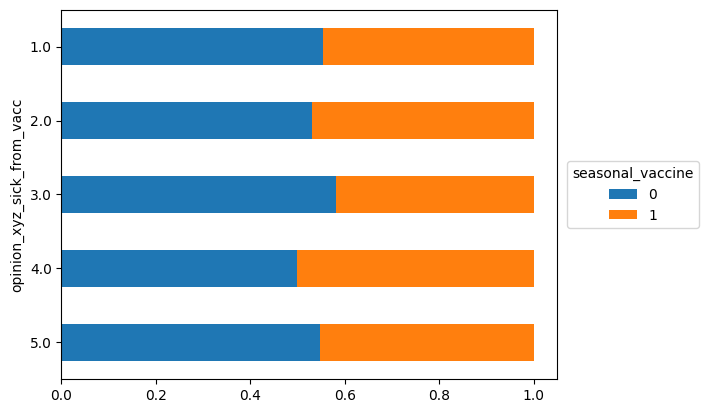

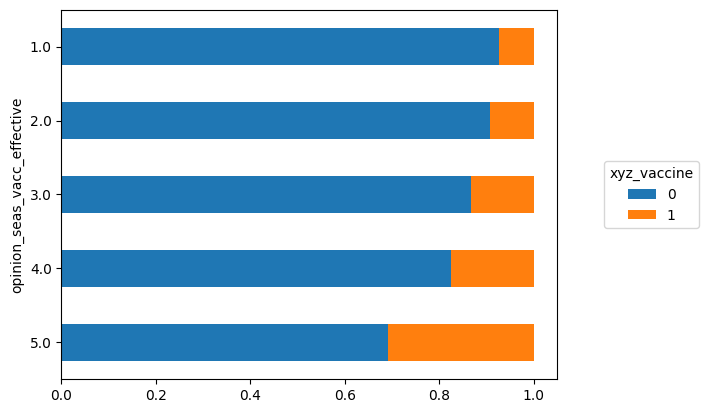

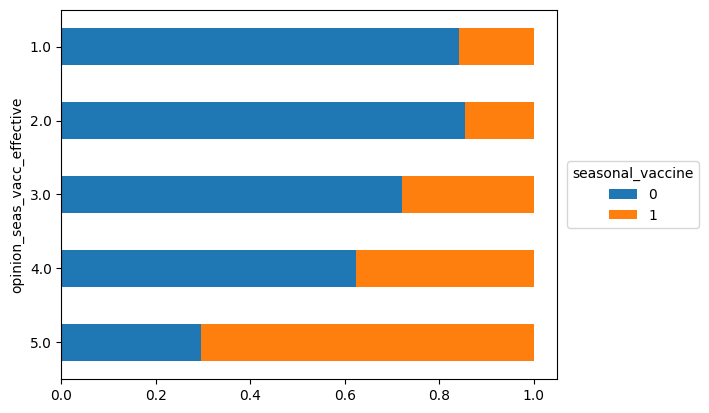

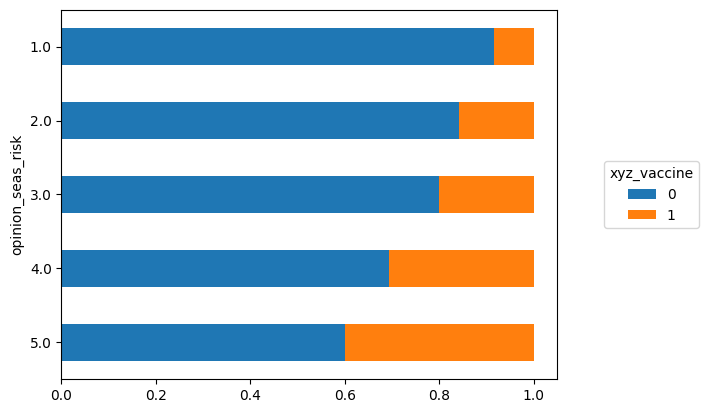

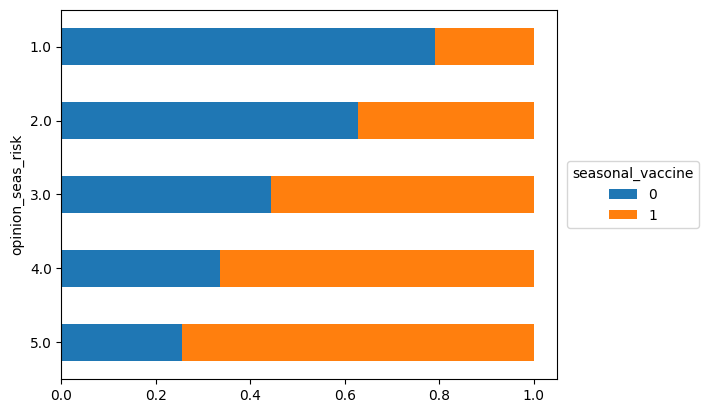

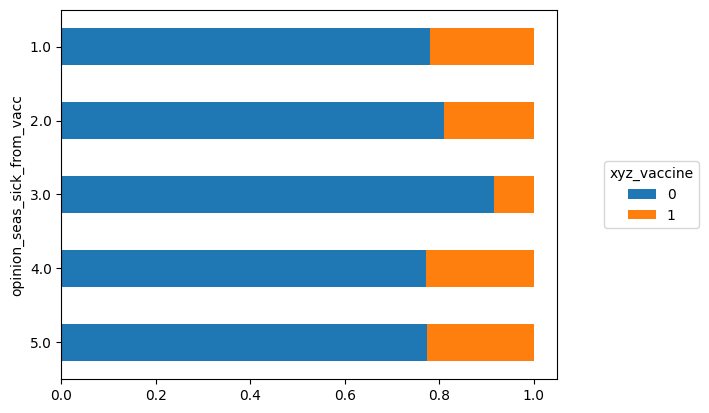

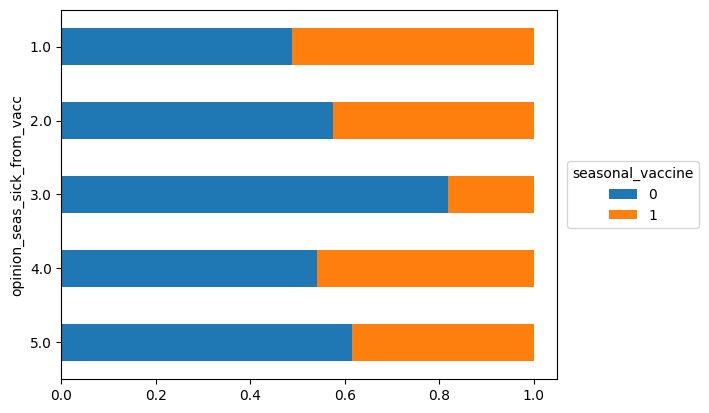

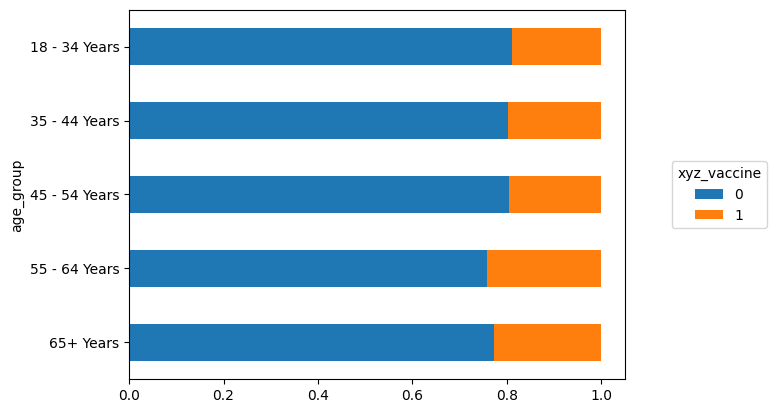

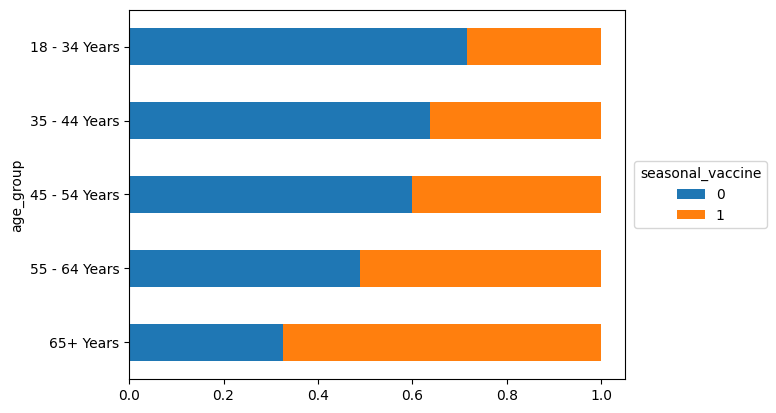

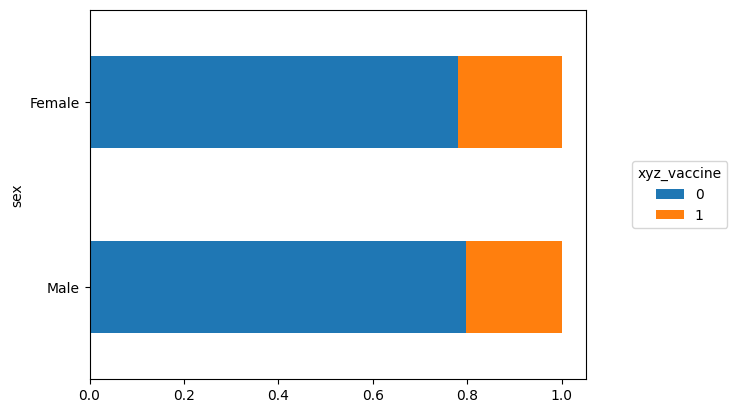

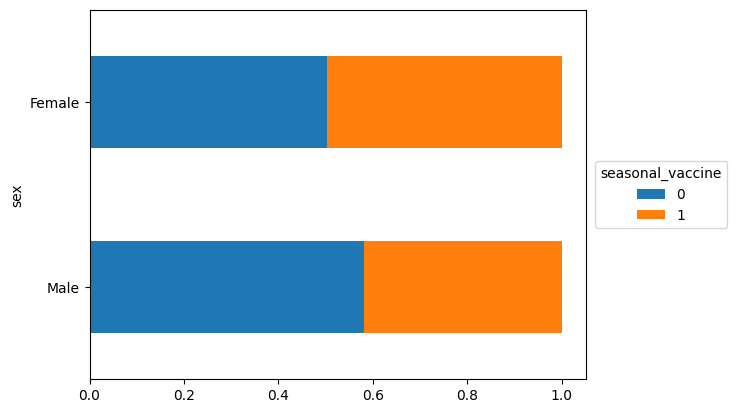

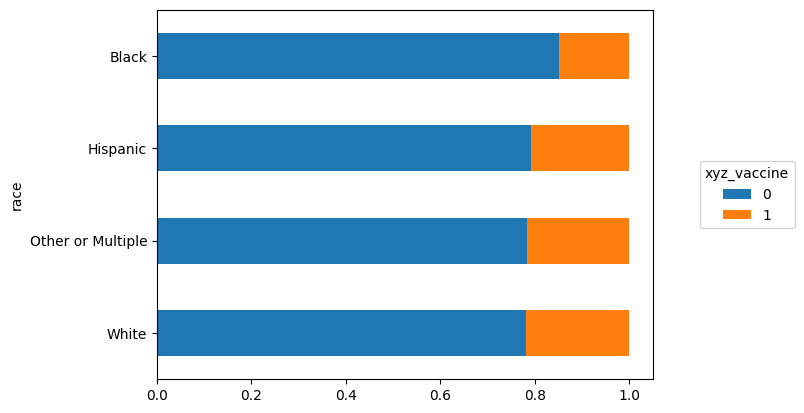

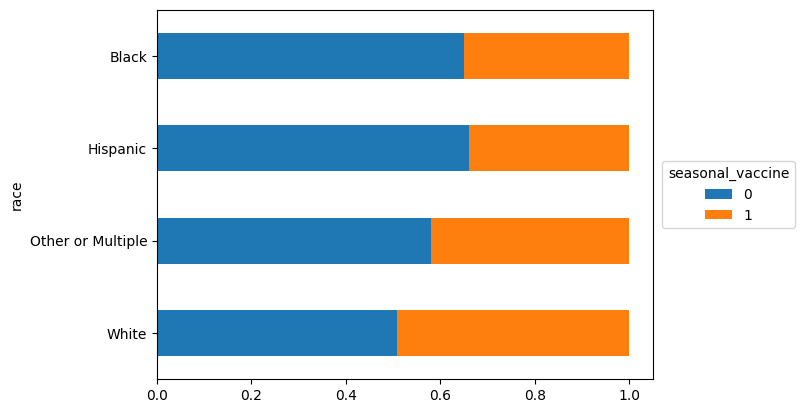

In [27]:
columns = ['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_xyz', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'sex', 'race']
labellings = ['xyz_vaccine', 'seasonal_vaccine']

for column in columns:
    for label in labels:
        vacc_rate_plot(column, label)

# Data Preprocessing

In [28]:
features.dtypes != "object"

xyz_concern                     True
xyz_knowledge                   True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_xyz                 True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_xyz_vacc_effective      True
opinion_xyz_risk                True
opinion_xyz_sick_from_vacc      True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
marital_status                 False
r

In [29]:
features['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [30]:
features['education'].value_counts()

education
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: count, dtype: int64

In [31]:
features['income_poverty'].value_counts()

income_poverty
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: count, dtype: int64

In [32]:
features['employment_status'].value_counts()

employment_status
Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: count, dtype: int64

In [33]:
features['hhs_geo_region'].value_counts()

hhs_geo_region
lzgpxyit    4297
fpwskwrf    3265
qufhixun    3102
oxchjgsf    2859
kbazzjca    2858
bhuqouqj    2846
mlyzmhmf    2243
lrircsnp    2078
atmpeygn    2033
dqpwygqj    1126
Name: count, dtype: int64

In [34]:
features['census_msa'].value_counts()

census_msa
MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: count, dtype: int64

In [35]:
features['employment_industry'].value_counts()

employment_industry
fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: count, dtype: int64

In [36]:
features['employment_occupation'].value_counts()

employment_occupation
xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: count, dtype: int64

age_group                      OneHot
education                      Ordinal
race                           OneHot
sex                            OneHot
income_poverty                 Ordinal
marital_status                 OneHot
rent_or_own                    OneHot
employment_status              Ordinal
hhs_geo_region                 OneHot
census_msa                     Ordinal
employment_industry            OneHot
employment_occupation          OneHot

In [37]:
features['household_adults'].value_counts()

household_adults
1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: count, dtype: int64

In [38]:
nominal_columns = ['age_group', 'race', 'sex', 'marital_status',
       'rent_or_own', 'hhs_geo_region', 'employment_industry',
       'employment_occupation', 'education', 'income_poverty', 'employment_status', 'census_msa']

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [40]:
features1 = features
features1

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [41]:
features1.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [43]:
# Define ColumnTransformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown = 'ignore', drop='if_binary', sparse_output=False), nominal_columns),
        ('scale', StandardScaler(), ['xyz_concern'])
    ],
    remainder='passthrough'
)

# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(features)

# Get feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_columns)

# Combine with the rest of the columns
passthrough_columns = [col for col in features.columns if col not in nominal_columns]
all_feature_names = list(onehot_feature_names) + passthrough_columns

# Convert preprocessed data back to DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

# Convert all columns to numeric if possible
preprocessed_df = preprocessed_df.apply(pd.to_numeric, errors='ignore')

# Check the data types
print(preprocessed_df.dtypes)

age_group_18 - 34 Years        float64
age_group_35 - 44 Years        float64
age_group_45 - 54 Years        float64
age_group_55 - 64 Years        float64
age_group_65+ Years            float64
                                ...   
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
Length: 111, dtype: object


In [44]:
features = preprocessed_df

# Combine one-hot encoded data with passthrough columns
combined_data = pd.DataFrame(np.hstack((preprocessed_data[:, :len(onehot_feature_names)], passthrough_data)), columns=all_feature_names)
combined_data = combined_data.apply(pd.to_numeric, errors='ignore')
print(combined_data)
print(combined_data.dtypes)

In [45]:
numeric_cols = features.columns[features.dtypes != "object"].values
print(numeric_cols)

['age_group_18 - 34 Years' 'age_group_35 - 44 Years'
 'age_group_45 - 54 Years' 'age_group_55 - 64 Years' 'age_group_65+ Years'
 'race_Black' 'race_Hispanic' 'race_Other or Multiple' 'race_White'
 'sex_Male' 'marital_status_Married' 'marital_status_Not Married'
 'marital_status_nan' 'rent_or_own_Own' 'rent_or_own_Rent'
 'rent_or_own_nan' 'hhs_geo_region_atmpeygn' 'hhs_geo_region_bhuqouqj'
 'hhs_geo_region_dqpwygqj' 'hhs_geo_region_fpwskwrf'
 'hhs_geo_region_kbazzjca' 'hhs_geo_region_lrircsnp'
 'hhs_geo_region_lzgpxyit' 'hhs_geo_region_mlyzmhmf'
 'hhs_geo_region_oxchjgsf' 'hhs_geo_region_qufhixun'
 'employment_industry_arjwrbjb' 'employment_industry_atmlpfrs'
 'employment_industry_cfqqtusy' 'employment_industry_dotnnunm'
 'employment_industry_fcxhlnwr' 'employment_industry_haxffmxo'
 'employment_industry_ldnlellj' 'employment_industry_mcubkhph'
 'employment_industry_mfikgejo' 'employment_industry_msuufmds'
 'employment_industry_nduyfdeo' 'employment_industry_phxvnwax'
 'employment_indus

# Model Selection

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

## Logistic Regression

In [47]:
# chain preprocessing into a Pipeline object
# each step is a tuple of (name you chose, sklearn transformer)
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

# create the preprocessor stage of final pipeline
# each entry in the transformer list is a tuple of
# (name you choose, sklearn transformer, list of columns)
preprocessor = ColumnTransformer(
    transformers = [
        ("numeric", numeric_preprocessing_steps, numeric_cols)
    ],
    remainder = "drop"
)

In [48]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)

In [49]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [50]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features,
    labels,
    test_size=0.33,
    shuffle=True,
    stratify=labels,
    random_state=42
)

In [51]:
%%time

# Train model
full_pipeline.fit(X_train, y_train)

# Predict on evaluation set
# This competition wants probabilities, not labels
preds = full_pipeline.predict_proba(X_eval)
preds

CPU times: total: 422 ms
Wall time: 698 ms


[array([[0.94850185, 0.05149815],
        [0.21552213, 0.78447787],
        [0.9604206 , 0.0395794 ],
        ...,
        [0.18866627, 0.81133373],
        [0.99087611, 0.00912389],
        [0.62010933, 0.37989067]]),
 array([[0.99100386, 0.00899614],
        [0.0499152 , 0.9500848 ],
        [0.90911718, 0.09088282],
        ...,
        [0.0765488 , 0.9234512 ],
        [0.7767112 , 0.2232888 ],
        [0.58595565, 0.41404435]])]

In [52]:
print(preds[0].shape)
print(preds[1].shape)

(8814, 2)
(8814, 2)


In [53]:
y_preds = pd.DataFrame(
    {
        "xyz_vaccine": preds[0][:, 1],
        "seasonal_vaccine": preds[1][:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_preds.shape)
y_preds.head()

y_preds.shape: (8814, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
6368,0.051498,0.008996
12566,0.784478,0.950085
13996,0.039579,0.090883
12769,0.791018,0.998617
16915,0.072555,0.131802


In [54]:
roc_auc_score(y_eval, y_preds)

0.8461931967837648

## Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
y_train_xyz = y_train['xyz_vaccine']
y_train_seasonal = y_train['seasonal_vaccine']


In [57]:
y_eval_xyz = y_eval['xyz_vaccine']
y_eval_seasonal = y_eval['seasonal_vaccine']


In [58]:
estimators = GaussianNB()

In [59]:
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [60]:
# Initialize Naive Bayes classifier (GaussianNB for numeric features)
nb_classifier = GaussianNB()


# Train the classifier
full_pipeline.fit(X_train, y_train_xyz)
pred_xyz = full_pipeline.predict_proba(X_eval)

In [61]:
y_pred_xyz = pd.DataFrame(
    {
        "xyz_vaccine": pred_xyz[:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_pred_xyz.shape)
y_pred_xyz.head()

y_preds.shape: (8814, 1)


,xyz_vaccine
respondent_id,
6368,6.311170e-10
12566,9.999951e-01
13996,3.083029e-11
12769,1.000000e+00
16915,9.706834e-01


In [62]:
roc_auc_score(y_eval_xyz, y_pred_xyz)

0.7063373999955677

## SVM

from sklearn.svm import SVC


estimators = SVC(kernel='linear', probability = True, random_state=42)

full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

%%time
# Train the classifier
full_pipeline.fit(X_train, y_train_xyz)
pred_xyz = full_pipeline.predict_proba(X_eval)


pred_xyz

y_pred_xyz = pd.DataFrame(
    {
        "xyz_vaccine": pred_xyz[:, 1],
    },
    index = y_eval.index
)
print("y_preds.shape:", y_pred_xyz.shape)
y_pred_xyz.head()

roc_auc_score(y_eval_xyz, y_pred_xyz)

## Final Model Selection and Test Training

In [63]:
estimators = MultiOutputClassifier(
    estimator=LogisticRegression(penalty="l2", C=1)
)
full_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("estimators", estimators),
])

In [64]:
full_pipeline.fit(features, labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['age_group_18 - 34 Years', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'race_Black', 'race_Hispanic',
       'race_Other or Multip...
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [65]:
test = pd.read_csv("test_set_features.csv", index_col="respondent_id")

In [66]:
test.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [67]:
# Define ColumnTransformer with OneHotEncoder and StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary', sparse_output=False), nominal_columns),
        ('scale', StandardScaler(), ['xyz_concern'])
    ],
    remainder='passthrough'
)

# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(test)

# Get feature names after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(nominal_columns)

# Combine with the rest of the columns
passthrough_columns = [col for col in test.columns if col not in nominal_columns]
all_feature_names = list(onehot_feature_names) + passthrough_columns

# Convert preprocessed data back to DataFrame
preprocessed_df = pd.DataFrame(preprocessed_data, columns=all_feature_names)

# Convert all columns to numeric if possible
preprocessed_df = preprocessed_df.apply(pd.to_numeric, errors='ignore')

# Check the data types
print(preprocessed_df.dtypes)

age_group_18 - 34 Years        float64
age_group_35 - 44 Years        float64
age_group_45 - 54 Years        float64
age_group_55 - 64 Years        float64
age_group_65+ Years            float64
                                ...   
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
household_adults               float64
household_children             float64
Length: 111, dtype: object


In [68]:
test = preprocessed_df

In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore',drop='if_binary', sparse_output=False), nominal_columns),
    ],
    remainder='passthrough'
)


In [71]:
test

,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Male,...,health_worker,health_insurance,opinion_xyz_vacc_effective,opinion_xyz_risk,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,3.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0
26704,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,1.0,3.0
26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,1.0,0.0
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,2.0,3.0,4.0,4.0,3.0,2.0,1.0,0.0


In [72]:
test_probas = full_pipeline.predict_proba(test)
test_probas

[array([[0.94311449, 0.05688551],
        [0.95256437, 0.04743563],
        [0.59364785, 0.40635215],
        ...,
        [0.86438294, 0.13561706],
        [0.94084818, 0.05915182],
        [0.53009742, 0.46990258]]),
 array([[0.70421862, 0.29578138],
        [0.95453539, 0.04546461],
        [0.4071688 , 0.5928312 ],
        ...,
        [0.79984266, 0.20015734],
        [0.63847379, 0.36152621],
        [0.56264138, 0.43735862]])]

In [73]:
submission = pd.read_csv("submission_format.csv", index_col="respondent_id")
submission

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7
...,...,...
53410,0.5,0.7
53411,0.5,0.7
53412,0.5,0.7


In [74]:
# Make sure we have the rows in the same order
# Save predictions to submission data frame
submission["h1n1_vaccine"] = test_probas[0][:, 1]
submission["seasonal_vaccine"] = test_probas[1][:, 1]

submission.head()


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.056886,0.295781
26708,0.047436,0.045465
26709,0.406352,0.592831
26710,0.486738,0.877661
26711,0.156952,0.473860


In [75]:
submission.to_csv('my_submission.csv', index=True)